# Карасов Николай Дмитриевич

# Домашняя работа №2

## Задача

Численно исследуйте поведение среднеквадратичного отклонения (СКО) построенных оценок: генерируете выборку из нужного распределения, оцениваете параметр, считаете отклонение оценки от параметра, повторяете это много раз, получаете оценку СКО, строите график зависимости СКО от $k$.

Рассмотрим случай равномерного распределения $U[0,\theta]$. Оценка параметра $\theta$, полученная с помощью метода моментов, имеет вид:

$$\hat{\theta} = \Big((k + 1)\overline{x^k}\Big)^{\frac{1}{k}}.$$

В случае экспоненциального распределения оценка имеет вид:

$$\hat{\theta} = \Big(\frac{\overline{x^k}}{k!}\Big)^{\frac{1}{k}}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [20]:
def mse_uniform(experiments=1000, sample_size=1000, k_max=150, theta=1):
    df = [0] * k_max
    
    for i in range(experiments):
        sample = np.random.uniform(0, theta, sample_size)
        
        for j in range(1, k_max + 1):
            estimation = ((j + 1) * np.mean(sample ** j)) ** (1.0 / j)
            df[j - 1] += (estimation - theta) ** 2
    
    return k_max, [el / experiments for el in df]

In [21]:
def mse_exponential(experiments=1000, sample_size=1000, k_max=150, theta=1):
    df = [0] * k_max
    
    for i in range(experiments):
        sample = np.random.exponential(theta, sample_size)
        
        for j in range(1, k_max + 1):
            estimation = (np.mean(sample ** j) / factorial(j)) ** (1 / j)
            df[j - 1] += (estimation - theta) ** 2
    
    return k_max, [el / experiments for el in df]

## Построим графики

In [22]:
k_uni, df_uni = mse_uniform()
k_exp, df_exp = mse_exponential()

In [23]:
def _plot(x1, y1, x2, y2, theta):
    w, h = 15, 5
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h))
    fig.suptitle('Зависимость СКО от k, theta = ' + str(theta))

    ax1.plot(range(1, x1 + 1), y1)
    ax1.set_title('Случай равномерного распределения')
    ax1.set_ylabel('СКО')
    ax1.set_xlabel('k')

    ax2.plot(range(1, x2 + 1), y2)
    ax2.set_title('Случай экспоненциального распредедения')
    ax2.set_ylabel('СКО')
    ax2.set_xlabel('k')

    plt.show()

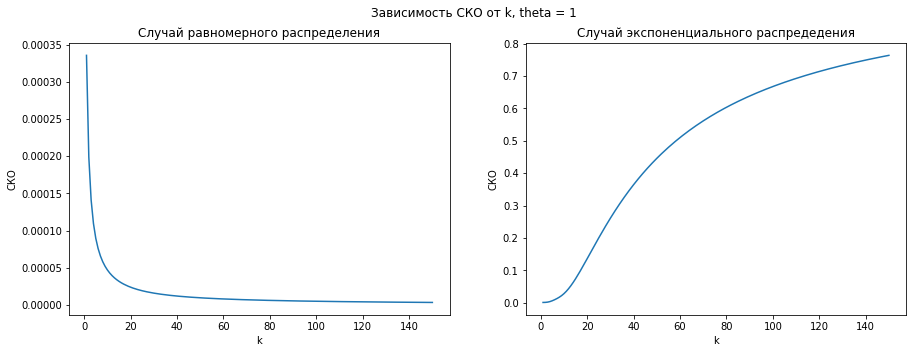

In [24]:
_plot(k_uni, df_uni, k_exp, df_exp, 1)

In [25]:
k_uni, df_uni = mse_uniform(theta=2)
k_exp, df_exp = mse_exponential(theta=2)

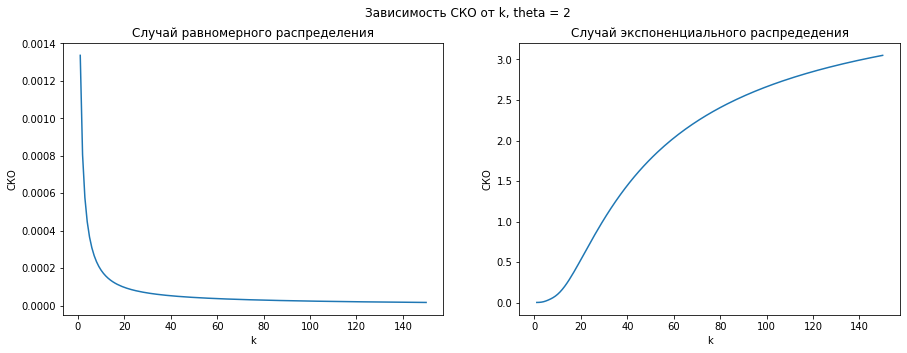

In [26]:
_plot(k_uni, df_uni, k_exp, df_exp, 2)

In [27]:
k_uni, df_uni = mse_uniform(theta=7)
k_exp, df_exp = mse_exponential(theta=7)

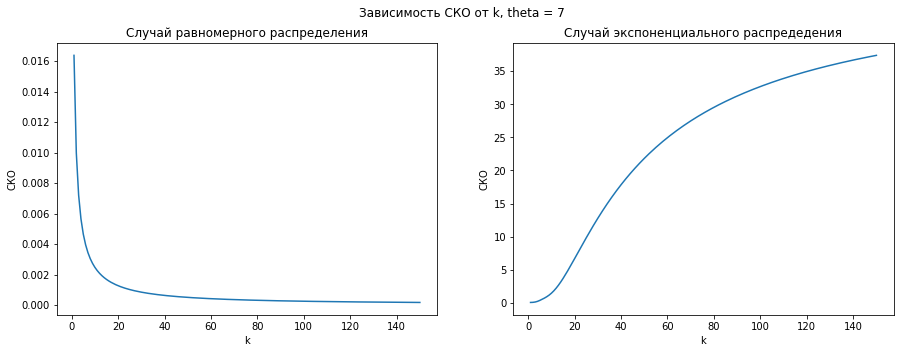

In [28]:
_plot(k_uni, df_uni, k_exp, df_exp, 7)

In [29]:
k_uni, df_uni = mse_uniform(theta=0.5)
k_exp, df_exp = mse_exponential(theta=0.5)

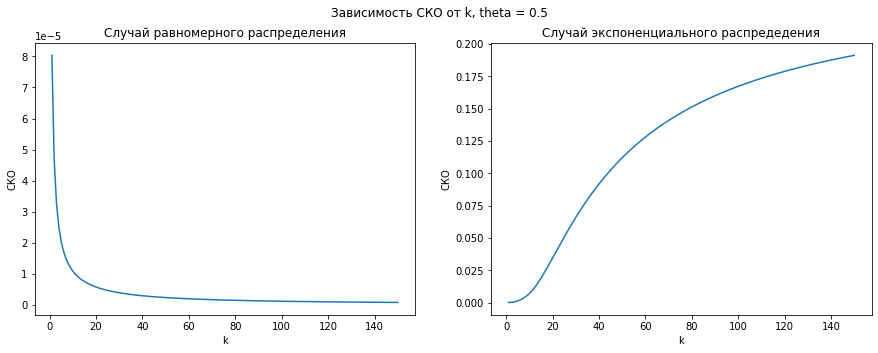

In [30]:
_plot(k_uni, df_uni, k_exp, df_exp, 0.5)

Из построенных выше графиков можно сделать следующие выводы. Для равномерного распределения с увеличением значения $k$ оценка становится все лучше, эффективнее. При этом варьирование параметра $\theta$ не вносит качественных изменений.

Для экспоненциального распределения ситуация обратная. С увеличением значения $k$ оценка становится хуже, поэтому лучше брать значение $k$ поменьше. При этом варьирование параметра $\theta$ все так же не вносит качественных изменений.